In [26]:
import pandas as pd
import numpy as np
import dill as pickle
from datetime import datetime, timedelta

from cosinorage.datahandlers import GalaxyDataHandler, plot_orig_enmo, plot_enmo, plot_orig_enmo_freq
from cosinorage.features import WearableFeatures, plot_cosinor, plot_sleep_predictions, plot_non_wear

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
reload_galaxy = True

In [28]:
preprocess_args = {
    'rescale_factor': 1/(10),
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [29]:
if reload_galaxy:
    galaxy_loader = GalaxyDataHandler(galaxy_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess=True, preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_loader.pkl", "wb") as file:
        pickle.dump(galaxy_loader, file)
else:
    with open("pickle/galaxy_loader.pkl", "rb") as file:
        galaxy_loader = pickle.load(file)

Read 142 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 12537000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 1894214/10642786 accelerometer records due to filtering out first and last day
Filtered out 0/10642786 accelerometer records due to incomplete daily coverage
Filtered out 0/10642786 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Resampled 10642786 to 10800000 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Preprocessed accelerometer data
Calculated ENMO for 10800000 accelerometer records
Aggregated ENMO values at the minute level leading to 7200 records
__load_data executed in 52.44 seconds


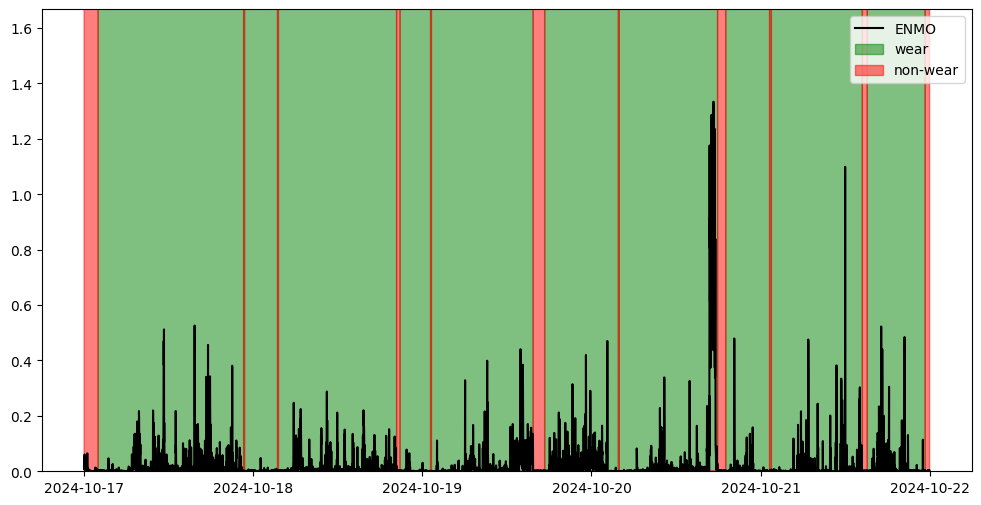

In [30]:
plot_enmo(galaxy_loader)

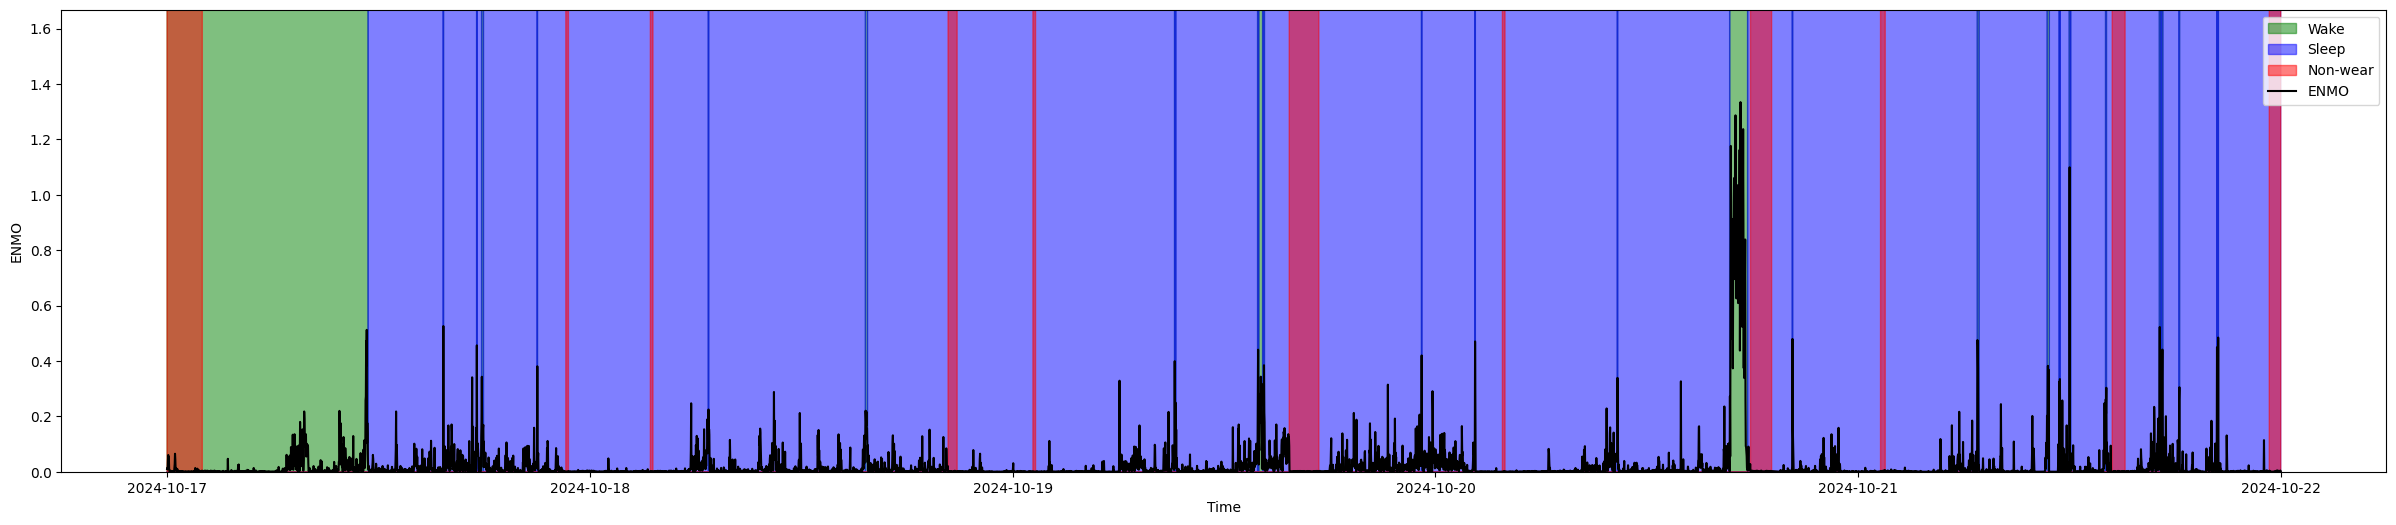

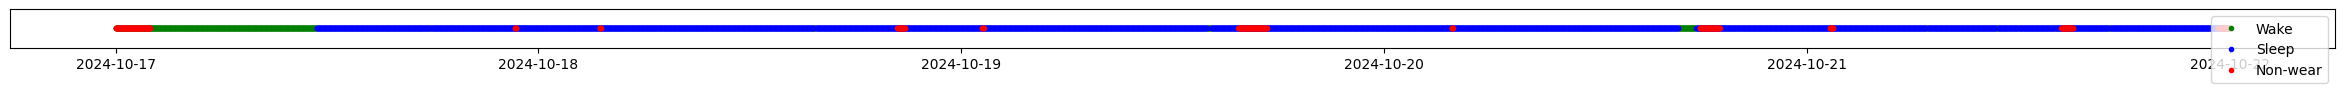

In [31]:
features = WearableFeatures(galaxy_loader)
features.run()
plot_sleep_predictions(features, simple=False)
plot_sleep_predictions(features, simple=True)

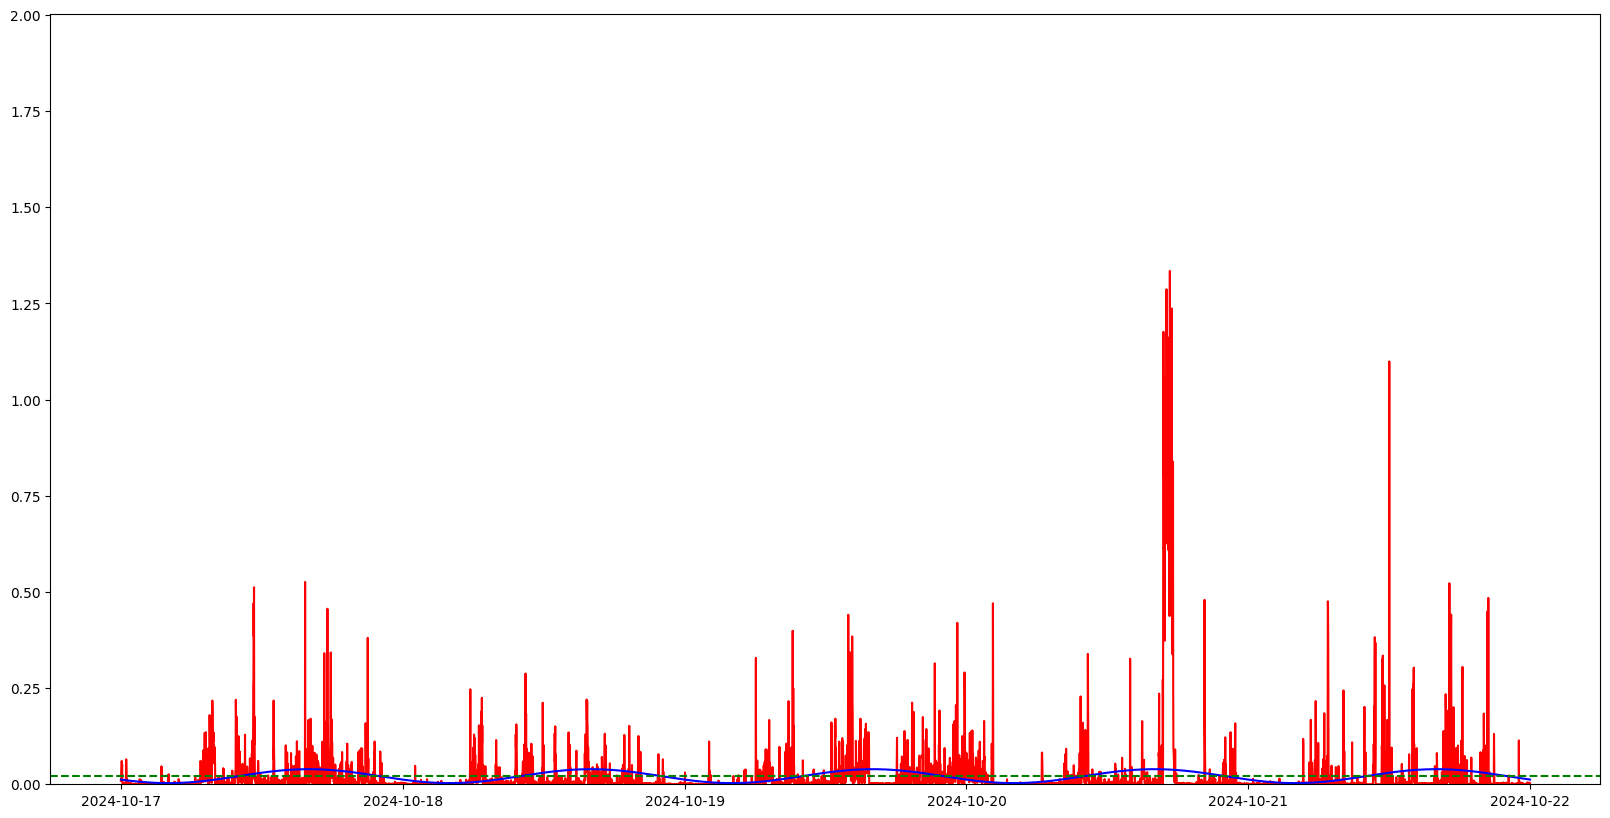

In [32]:
plot_cosinor(features, multiday=True)

In [33]:
features.get_cosinor_features()[1]

{'MESOR': 0.02114253120675589,
 'amplitude': 0.018104271299888574,
 'acrophase': 4.196729134823709,
 'acrophase_time': 16.030324478999198}

In [34]:
features.get_all()

(               MESOR  amplitude  acrophase  acrophase_time        IV  \
 2024-10-17  0.018073   0.012910   3.676934       14.044852  0.977223   
 2024-10-18  0.011558   0.008171   3.158239       12.063585  0.870422   
 2024-10-19  0.020179   0.011202   4.285322       16.368725  1.039864   
 2024-10-20  0.039739   0.056556   4.532720       17.313714  0.221223   
 2024-10-21  0.016164   0.012287   3.669307       14.015720  1.213368   
 
                   IS        RA       M10  M10_start        L5  L5_start  \
 2024-10-17  0.777944  0.903415  0.034755          7  0.001764         5   
 2024-10-18  1.907214  0.865388  0.021278          6  0.001535        23   
 2024-10-19  0.757705  0.930234  0.038124         14  0.001378         1   
 2024-10-20  0.079135  0.974462  0.089015         17  0.001151         4   
 2024-10-21  0.454910  0.923307  0.032547         17  0.001298         3   
 
                   SB       LIPA      MVPA  TST    WASO       PTA        SRI  
 2024-10-17  0.133333  

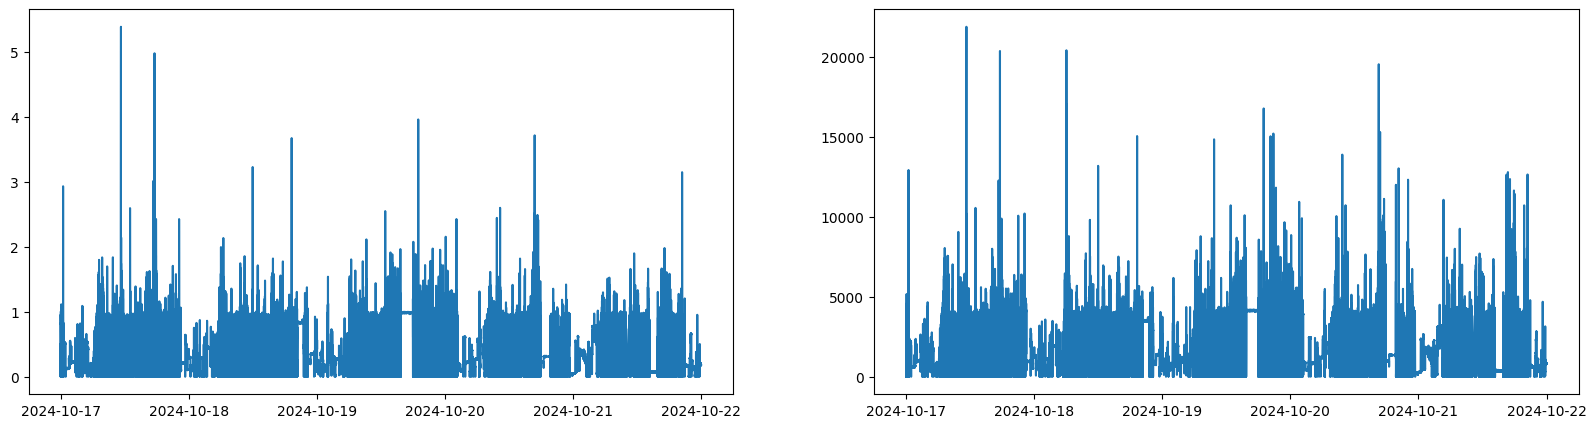

In [35]:
import matplotlib.pyplot as plt
# two plots next to each other
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(abs(galaxy_loader.get_sf_data()['X']))
plt.subplot(1, 2, 2)
plt.plot(galaxy_loader.get_sf_data()['X_raw'])
plt.show()

In [36]:
galaxy_loader.get_meta_data()

{'datasource': 'samsung galaxy watch',
 'raw_n_timesteps': 12537000,
 'raw_n_days': 7,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_frequency': 'irregular (~25Hz)',
 'raw_datatype': 'accelerometer',
 'raw_unit': '',
 'resampled_n_timestamps': 10800000,
 'resampled_n_days': 5,
 'resampled_start_datetime': Timestamp('2024-10-17 00:00:00'),
 'resampled_end_datetime': Timestamp('2024-10-21 23:59:59.960000'),
 'resampled_frequency': '25Hz',
 'resampled_datatype': 'accelerometer',
 'resampled_unit': '',
 'calibration_offset': array([-0.01739324,  0.00449154, -0.00464635]),
 'calibration_scale': array([0.99252398, 0.99404835, 0.989714  ]),
 'resampled_total_time': 431999.96,
 'resampled_wear_time': 405619.60000000003,
 'resampled_non-wear_time': 26380.359999999986}

In [37]:
abs(galaxy_loader.get_raw_data()['X']).describe()

count    1.253700e+07
mean     1.890718e+03
std      1.346557e+03
min      0.000000e+00
25%      7.130000e+02
50%      1.642000e+03
75%      3.030000e+03
max      3.275000e+04
Name: X, dtype: float64